In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("bank-full.csv",sep=";")
print(df.head())
print(df.shape)

print(df.isnull().sum())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
(45211, 17)
age          0
job          0
marital      0
education    0
default      0
balance      0
housing  

In [3]:
df_encoded=pd.get_dummies(df,drop_first=True)
print(df_encoded)

       age  balance  day  duration  campaign  pdays  previous  \
0       58     2143    5       261         1     -1         0   
1       44       29    5       151         1     -1         0   
2       33        2    5        76         1     -1         0   
3       47     1506    5        92         1     -1         0   
4       33        1    5       198         1     -1         0   
...    ...      ...  ...       ...       ...    ...       ...   
45206   51      825   17       977         3     -1         0   
45207   71     1729   17       456         2     -1         0   
45208   72     5715   17      1127         5    184         3   
45209   57      668   17       508         4     -1         0   
45210   37     2971   17       361         2    188        11   

       job_blue-collar  job_entrepreneur  job_housemaid  ...  month_jun  \
0                False             False          False  ...      False   
1                False             False          False  ...      Fal

In [25]:
X=df_encoded.drop(columns=["y_yes"])
y=df_encoded["y_yes"]
print(X)

       age  balance  day  duration  campaign  pdays  previous  \
0       58     2143    5       261         1     -1         0   
1       44       29    5       151         1     -1         0   
2       33        2    5        76         1     -1         0   
3       47     1506    5        92         1     -1         0   
4       33        1    5       198         1     -1         0   
...    ...      ...  ...       ...       ...    ...       ...   
45206   51      825   17       977         3     -1         0   
45207   71     1729   17       456         2     -1         0   
45208   72     5715   17      1127         5    184         3   
45209   57      668   17       508         4     -1         0   
45210   37     2971   17       361         2    188        11   

       job_blue-collar  job_entrepreneur  job_housemaid  ...  month_jul  \
0                False             False          False  ...      False   
1                False             False          False  ...      Fal

In [26]:
print(y)

0        False
1        False
2        False
3        False
4        False
         ...  
45206     True
45207     True
45208     True
45209    False
45210    False
Name: y_yes, Length: 45211, dtype: bool


In [30]:
from sklearn.model_selection import train_test_split
X_test,X_train,y_test,y_train=train_test_split(X,y, test_size=0.2,random_state=42) 
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [31]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion="entropy",max_depth=5)
model.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [34]:
y_pred=model.predict(X_test)
print(y_pred)

[False False False ... False False False]


In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

print("accuracy score ", accuracy_score(y_test,y_pred))
print("confusion matrix ",confusion_matrix(y_test,y_pred))
print("classification report",classification_report(y_test,y_pred))


accuracy score  0.8962895377128953
confusion matrix  [[31471   499]
 [ 3252   946]]
classification report               precision    recall  f1-score   support

       False       0.91      0.98      0.94     31970
        True       0.65      0.23      0.34      4198

    accuracy                           0.90     36168
   macro avg       0.78      0.60      0.64     36168
weighted avg       0.88      0.90      0.87     36168



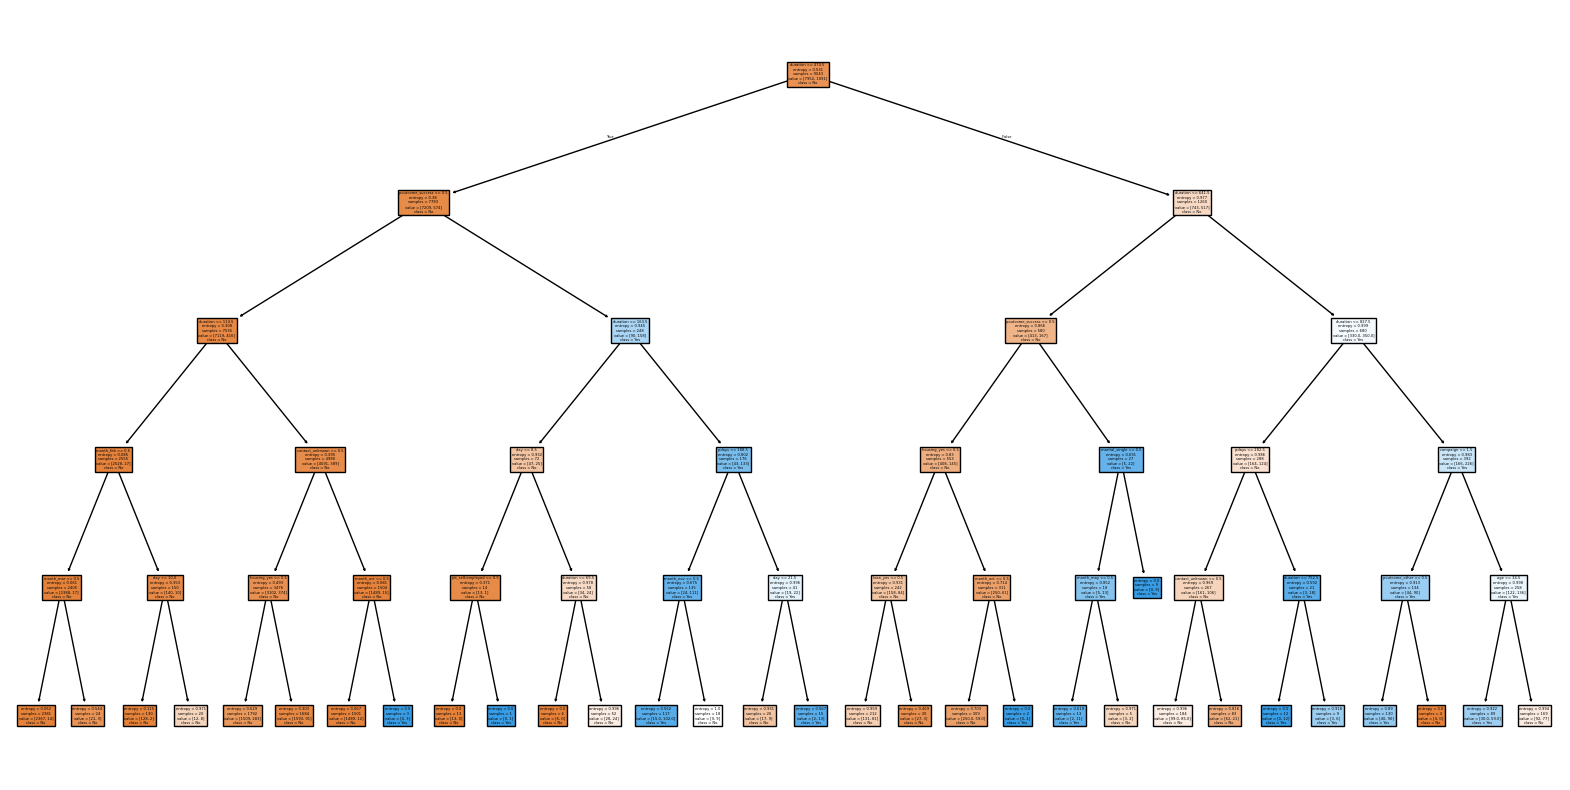

In [49]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True , feature_names=X.columns,class_names=["No","Yes"])
plt.show()


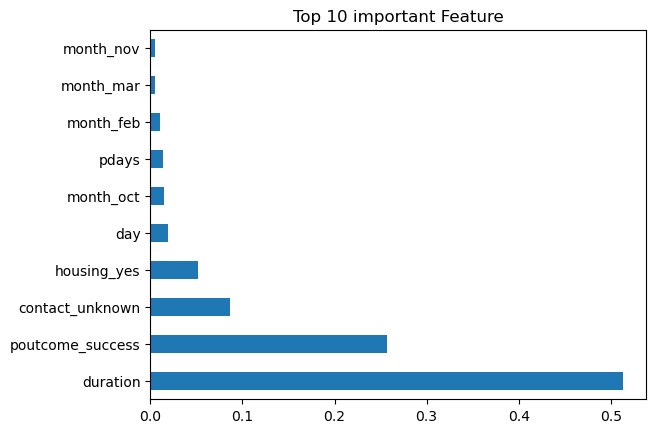

In [56]:
feat_imp=pd.Series(model.feature_importances_,index=X.columns)
feat_imp.nlargest(10).plot(kind="barh")
plt.title("Top 10 important Feature" )
plt.show()